# Linear Regression

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In short, Linear regression will refer to one independent variable to make a prediction.
Multiple Linear regression will refer to multiple independent variables to make a prediction.

Simple Linear Regression has one predictor(independent) variable x and target dependent variable (y).
y=b0+b1X
b0 is the intercept
b1 is the slope
When we fit and train the model these parameters are catched.

Lets understand that with simple examples below

The data is about the amount spent on advertising through different channels TV, Newspaper and Radio.
Goal is to predict how the expense on each channel affects the sales and is there anyway to optimise that sale

In [50]:
import pandas as pd
import numpy as np
import pickle
import scipy.stats as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Features : TV, Radio and Newspaper
Response : Sales 

In [51]:
data.shape

(200, 5)

In [52]:
data.info()
#In simple terms all are contious variables as all data type if Float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [53]:
data.isna().sum() #find the count of missing values from different columns

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

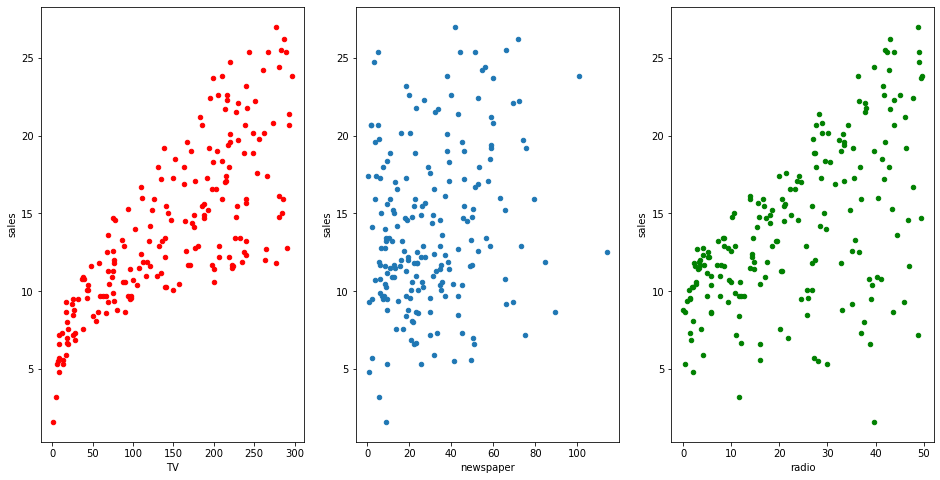

In [54]:
#Visualise the relationship between the features and response using scatterplots
#subplots - used only when plan to plot more than one graph
# testdata.jpg is saved at http://localhost:8888/tree/DataTrained/LinearRegression
fig,axs=plt.subplots(1,3)
data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8),color='r')
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[1],figsize=(16,8))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[2],figsize=(16,8),color='g')

fig.savefig('testdata.jpg')


In [55]:
x=data[['TV']]
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [56]:
X=data[['TV']]
y=data.sales
from sklearn.linear_model import LinearRegression

In [57]:
lm=LinearRegression()
lm.fit(X,y)

LinearRegression()

In [58]:
#Print Intercept and CoEfficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127694
[0.04753664]


In [59]:
#Intercept is going to tell us from where we should draw the relation line (c)
#Coef is the angle  (m)
#y=mx+c
#y is the prediction
#Increase the amount in TV advertisement by 50K and predict the number of TV Sales increased

In [60]:
X_new=pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


In [61]:
lm.predict(X_new)
#Model predicted 9.40 sale increment
#So we can analyse the relation between our advertisement and sales accordingly

array([9.40942557])

In [62]:
X_new=pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [63]:
preds=lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

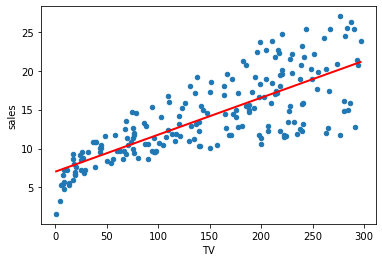

In [64]:
#First plot the observed data
data.plot(x='TV',y='sales',kind='scatter')
#then ,plot the less squared lines
plt.plot(X_new,preds,c='red',linewidth=2)

#The line is best fit line
#Notice that line started from 7 which is intercept

In [65]:
X_new

,TV
0,0.7
1,296.4


In [66]:
#Print the p-values for model co-efficients
#Check second observations
import statsmodels.formula.api as smf
lm=smf.ols(formula='sales ~ TV',data=data).fit()
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [67]:
# We are interested in TV only not in Intercept is less than aplha 0.05 
#Hence we reject Null Hypothesis
#Means ther is relation between TV Advertisement and Sales

In [68]:
lm=smf.ols(formula='sales ~ TV + radio + newspaper',data=data).fit()
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64

In [69]:
#Just for TV
lm.rsquared

0.8972106381789522

In [70]:
# We got 61% , so shall we trust our model or not.
# It will be used for simple linear regresssion.
# R square is a model to predict simple linear regression

Multiple Linear Regression

In [71]:
X=data[['TV','radio','newspaper']]
y=data.sales

In [72]:
lm=LinearRegression()
lm.fit(X,y)

LinearRegression()

In [73]:
print('Intercept',lm.intercept_)
print('TV',lm.coef_[0])
print('Radio',lm.coef_[1])
print('NewsPapaer',lm.coef_[2])


Intercept 2.9388893694594067
TV 0.04576464545539761
Radio 0.18853001691820453
NewsPapaer -0.00103749304247629


In [74]:
#We are going to invest in TV and Radio and not on newspaper.
#There is no relationship between Newspaper and sales, hence here we fail to reject Null Hypothesis
#For TV and Radio, We reject Null Hypothesis
lm=smf.ols(formula='sales ~ TV + radio + newspaper',data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        22:42:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
lm=smf.ols(formula='sales ~ TV + radio',data=data).fit()
lm.rsquared

0.8971942610828956

In [76]:
lm=smf.ols(formula='sales ~ TV + radio + newspaper',data=data).fit()
lm.rsquared

0.8972106381789522

Problem : Chance of getting admission

In [77]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [35]:
data=pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [36]:
data.drop(['Serial No.'],axis=1,inplace=True)


In [37]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [38]:
data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [39]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [109]:
# Universal Rating is a categorical data, so need not to check anything
# If Universal Rating is Null, you cannot fill with mean as decimals can come, so use mode
# mode means data which occurs more frequently

GRE Score
TOEFL Score
University Rating
SOP
LOR 
CGPA
Research
Chance of Admit 


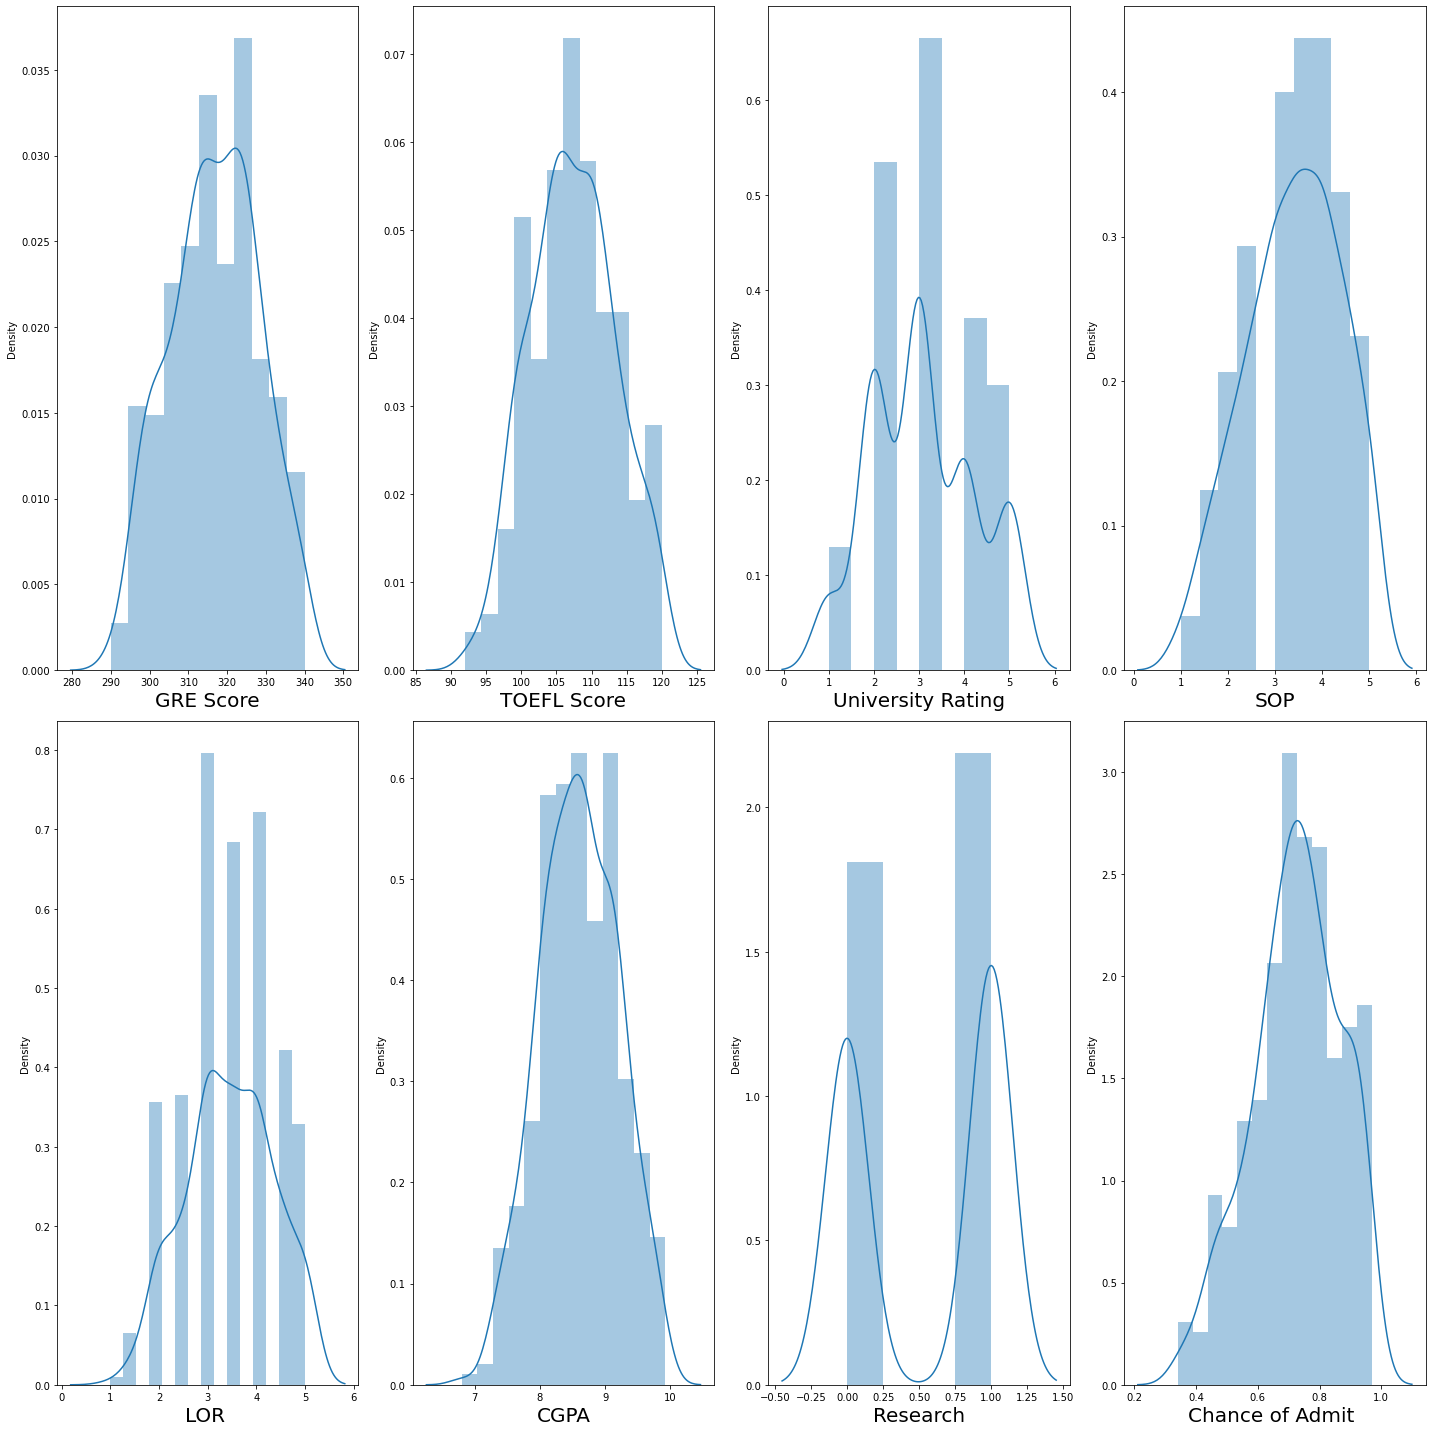

In [40]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in data:
    print(column)
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)        
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1   
    
plt.tight_layout()

In [50]:
data.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67
399,333,117,4,5.0,4.0,9.66,1,0.95


In [129]:
#Divide dataset into features and labels
#Research is fine as it is categorical data
#Keep all features in x and label in y , so in x we will not have Chance of columns



In [53]:
y=data['Chance of Admit ']
y
X=data.drop(columns=['Chance of Admit '])
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [54]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


TV
radio
newspaper


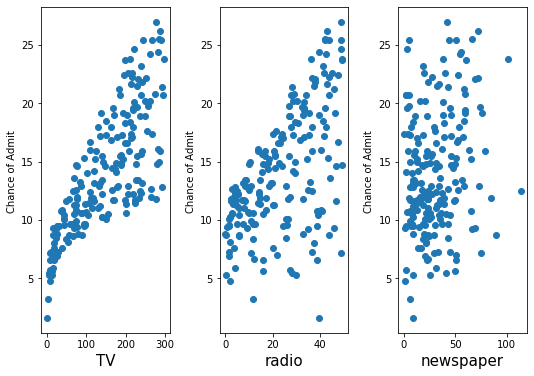

In [44]:
plt.figure(figsize=(10,10))
plotnumber=1

for column in X:
    print(column)
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)        
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Chance of Admit ',fontsize=10)
        
    plotnumber+=1   
    
plt.tight_layout()

If University rating is more, Chance of Admission is more though Universirt rating is Categorical data

In [45]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# Train Test Split

In [46]:
# Split data into train and test in the same order
# X_Scaled is feature
# y is our label
# random_state : you can give any number you want, it has its own way of picking the number in randomn order
# if you run multiple times index number will not chance until you change random_state

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=50)
y_train.head()

1      10.4
116    12.2
100    11.7
166     8.0
168    17.1
Name: sales, dtype: float64

# Model instantiating and training

In [47]:
regression= LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [78]:
#Predict the chance of admission now
data.tail(2)

,Unnamed: 0,TV,radio,newspaper,sales
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [80]:
# Since you have already fit the scaler, you can now predict the data.
# Pass your data and check the prediction
print('Chance of Admission',regression.predict(scaler.transform([[323,105,5]])))

Chance of Admission [37.32036207]


To save the data, we use Pickle, because we will have to run each and every line of code again and again
ANd it will be time consuming as real time analysis has millions of data to train

In [61]:
filename='finalised model pickle'
pickle.dump(regression,open(filename,'wb')) #to save we use pickle.dump() wb is to write

#prediction using the saved model
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler.transform([[314,103,5,4,4,8.98,1]]))
a

array([0.77890015])

In [63]:
# Adjusted R Square
# We check how well the model understands the data or how well the model is trained
regression.score(x_train,y_train)

0.8193370700006861

Lets Plot and visualise

In [64]:
y_pred=regression.predict(x_test)
y_pred

array([0.6678534 , 0.63611644, 0.73049292, 0.9148293 , 0.66191167,
       0.76863249, 0.67616722, 0.84836855, 0.83614136, 0.79808329,
       0.48163157, 0.66801071, 0.69045077, 0.61882777, 0.53266559,
       0.57702942, 0.49605994, 0.82251421, 0.62627602, 0.70334045,
       0.96277214, 0.85834459, 0.8569492 , 0.90191233, 0.62239436,
       0.69945711, 0.64078281, 0.89811577, 0.80135423, 0.75595174,
       0.90832009, 0.83793159, 0.59662533, 0.72800044, 0.71799946,
       0.60554994, 0.59734132, 0.7097765 , 0.78466267, 0.69881297,
       0.93290952, 0.66240843, 0.95170432, 0.69955181, 0.68816545,
       0.64630806, 0.65283471, 0.88150026, 0.95155753, 0.52089375,
       0.46480135, 0.54677445, 0.78995803, 0.72388375, 0.66277383,
       0.6558763 , 0.93454395, 0.74090541, 0.88007697, 0.9496488 ,
       0.67526856, 0.76200373, 0.80585476, 0.85660517, 0.52342601,
       0.70112992, 0.90097591, 0.72398081, 0.72027729, 0.73909227,
       0.76387935, 0.74063076, 0.733406  , 0.82460298, 0.66123

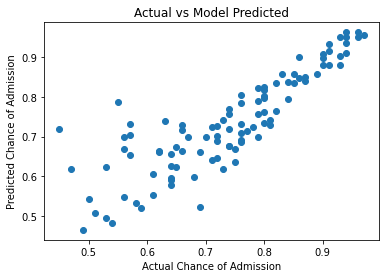

In [65]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predicted Chance of Admission')
plt.title('Actual vs Model Predicted')
plt.show()

<BarContainer object of 100 artists>

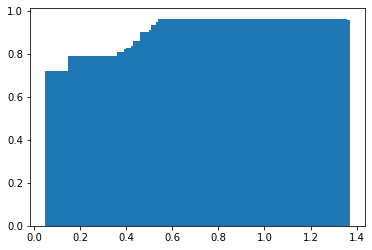

In [197]:
plt.bar(y_test,y_pred)

In [69]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [70]:
y_pred=regression.predict(x_test)

In [72]:
mean_absolute_error(y_test,y_pred)

0.04764888825493136

In [73]:
mean_squared_error(y_test,y_pred)

0.004526319242200031

In [74]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.06727792537080815

In [42]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

# Lasso Regularisation

In [81]:
# max_Iter depends on how big is dataset,you need to check how many times you want to iterate your data
#Eleminates teh features which are not needed.
#Example : Height is not related with chances of admission
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [77]:
# best alpha parameter
alpha=lasscv.alpha_
alpha

6.963232972246015e-05

In [79]:
# now that we have best parameter, Let's use Lasso Regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=6.963232972246015e-05)

In [80]:
lasso_reg.score(x_test,y_test)

0.7311081673543406

# Using Ridge Regression model

In [86]:
# CV is cross Validation

ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [87]:
ridgecv.alpha_

0.020999999999999998

In [84]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.020999999999999998)

In [88]:
ridge_model.score(x_test,y_test)

0.7310768137801036